<a href="https://colab.research.google.com/github/reekithak/Tuberculosis-CNN/blob/master/Mask-Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
drive.mount('/content/gdirve')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdirve


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdirve/My Drive/Kaggle"

In [16]:
pwd

'/content'

In [17]:
ls


gdirve/  sample_data/


In [20]:
%cd gdirve/

/content/gdirve


In [21]:
ls


'My Drive'/


In [22]:
cd 'My Drive'

/content/gdirve/My Drive


In [23]:
ls

 1479528178018.jpg
 1481429052866.jpg
 1581140417460_Links.gdoc
 2010-previous-year-paper-od.unlocked.pdf
 2011-previous-year-paper-od.unlocked.pdf
 2012-previous-year-paper-solution.unlocked.pdf
'2013-previous-year-paper-solution (1).unlocked.pdf'
'20160802_175822 (1).jpg'
 20160802_175822.jpg
 20160802_175825.jpg
 20160802_175829.jpg
 20160802_175831.jpg
 20160802_175833.jpg
 20160802_175839.jpg
 20160802_175840.jpg
 20160802_175841.jpg
 20160802_175844.jpg
 20160802_175845.jpg
 20160802_175914.jpg
 20160802_180343.jpg
'CertificateOfCompletion_Become A Machine Learning Specialist.pdf'
'CertificateOfCompletion_Building A Recommendation System With Python Machine Learning Ai.pdf'
'CertificateOfCompletion_Deploying Scalable Machine Learning For Data Science.pdf'
'CertificateOfCompletion_Essential Math For Machine Learning Python Edition.pdf'
'CertificateOfCompletion_Learning Nosql Databases.pdf'
'CertificateOfCompletion_Learning To Write For The Web (1).pdf'
'CertificateOfCompletion_Lea

In [24]:
cd Kaggle/

/content/gdirve/My Drive/Kaggle


In [29]:
cd "/content/gdirve/My Drive/Kaggle"

/content/gdirve/My Drive/Kaggle


In [30]:
pwd

'/content/gdirve/My Drive/Kaggle'

In [31]:
ls


kaggle.json


In [33]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.08G/4.09G [01:22<00:00, 53.4MB/s]
100% 4.09G/4.09G [01:22<00:00, 53.2MB/s]


In [34]:
!unzip pulmonary-chest-xray-abnormalities

Archive:  pulmonary-chest-xray-abnormalities.zip
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0002_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0003_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0004_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0005_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0006_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0007_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0008_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0009_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0010_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0011_0.png  
  inflating: ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0012_0.png  
  inflating: ChinaSet_AllFi

In [42]:
ls

__MACOSX/  MontgomerySet/


In [0]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

image_path = ("/content/gdirve/My Drive/Kaggle/Montgomery/MontgomerySet/CXR_png/")
mask_path = ("/content/gdirve/My Drive/Kaggle/Montgomery/MontgomerySet/ManualMask/")
rightMaskPath = os.path.join(mask_path,"./rightMask/")
leftMaskPath = os.path.join(mask_path,"./leftMask/")

In [44]:
def getData(image_path,rightMaskPath,leftMaskPath):
    images = os.listdir(image_path)
    rightMask = os.listdir(rightMaskPath)
    leftMask = os.listdir(leftMaskPath)

    print ("Mask Right:",len(rightMask))
    print ("Mask Left:",len(leftMask))
    print ("Image",len(os.listdir(image_path)))
    data = list(set(rightMask) & set(images)  & set(leftMask))
    print("total common image:", len(data))
    
    return data

data = getData(image_path,rightMaskPath,leftMaskPath)

Mask Right: 138
Mask Left: 139
Image 139
total common image: 138


In [0]:
file = data[15]

def getClass(fname):
    return int((fname.split(".")[0]).split("_")[-1])


def getMask(file_name):
    l = cv2.imread(leftMaskPath+file_name)
    r = cv2.imread(rightMaskPath+file_name)
    added_image = cv2.addWeighted(l,0.5,r,0.5,0)
    added_image=cv2.threshold(added_image,20,255,cv2.THRESH_BINARY)[1]
    return added_image[:,:,0]


def getImage(file_name):
    lung = cv2.imread(image_path+file_name)
    return lung[:,:,0]

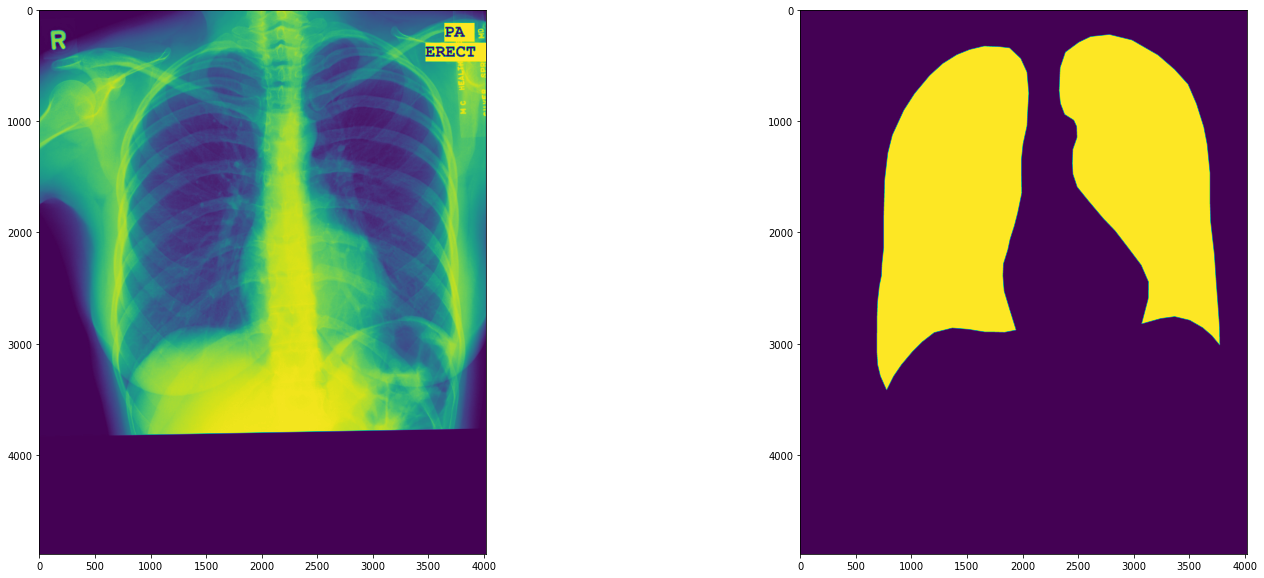

(4892, 4020)

In [46]:
lung = getImage(file)
mask = getMask(file)

plt.figure(figsize=(25,10))
plt.subplot(121)
plt.imshow(lung)
plt.subplot(122)
plt.imshow(mask)

plt.show()
lung.shape

In [47]:
pos=neg = 0
for i in data:
    clas =getClass(i) 
    if clas:
        pos+=1
    else:
        neg+=1
print("pos neg ::",pos,neg)

pos neg :: 58 80


In [48]:
from tqdm import tqdm
x_dim = 256
y_dim =256
images = [cv2.resize(getImage(img),(x_dim,y_dim))  for img in tqdm(data)]
masks = [cv2.resize(getMask(img),(x_dim,y_dim))  for img in tqdm(data) ]

100%|██████████| 138/138 [00:26<00:00,  5.14it/s]


In [0]:
images = np.array(images).reshape(len(images),x_dim,x_dim,1)
masks = np.array(masks).reshape(len(images),x_dim,x_dim,1)

(256, 256, 1)

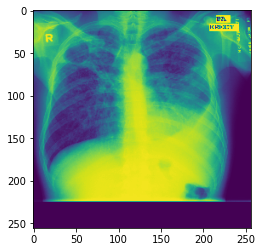

In [52]:
plt.imshow(np.squeeze(images[1]))
images[1].shape

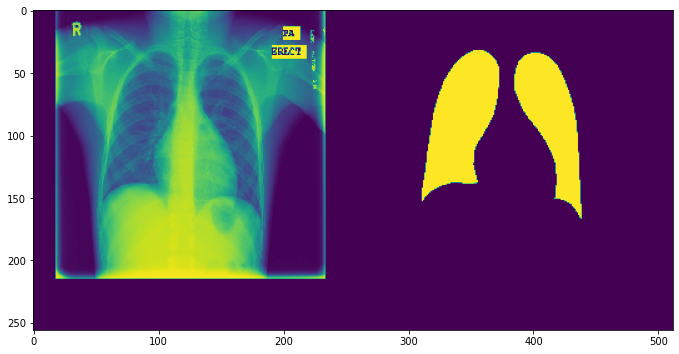

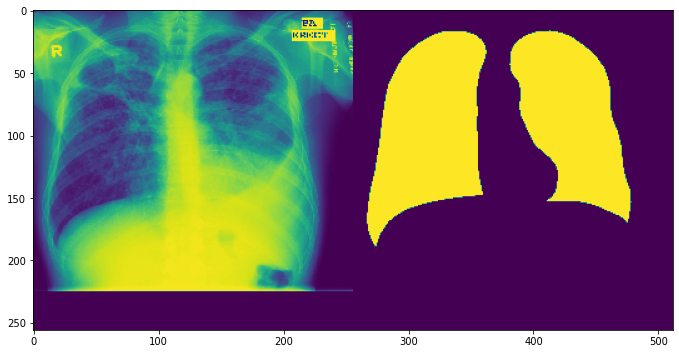

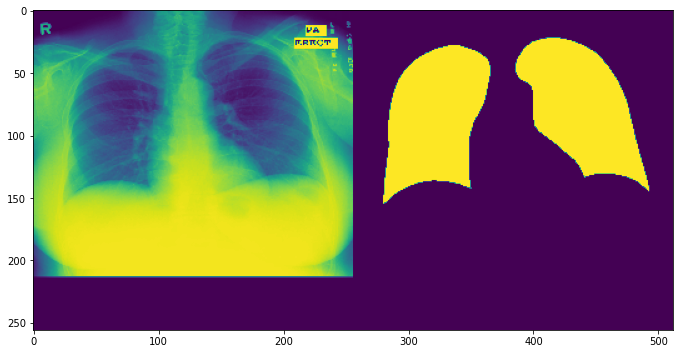

In [53]:
ls = np.random.randint(1,138,5)


for i in range(3):
    plt.figure(figsize=(25,20))
    plt.subplot(3,1,i+1)
    stacked = np.hstack((np.squeeze(images[i]),np.squeeze(masks[i])))
    plt.imshow(stacked)

In [54]:


from keras.optimizers import Adam
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

reg_param = 1.0
lr = 2e-4
dice_bce_param = 0.0
use_dice = True

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_p_bce(in_gt, in_pred):
    return dice_bce_param*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)

def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)

Using TensorFlow backend.


In [0]:
from keras.layers import Conv2D, Activation, Input, UpSampling2D, concatenate, BatchNormalization
from keras.layers import LeakyReLU
from keras.initializers import RandomNormal


def c2(x_in, nf, strides=1):
    x_out = Conv2D(nf, kernel_size=3, padding='same',
                   kernel_initializer='he_normal', strides=strides)(x_in)
    x_out = LeakyReLU(0.2)(x_out)
    return x_out


def unet_enc(vol_size, enc_nf, pre_filter = 8):
    src = Input(shape=vol_size + (1,), name = 'EncoderInput')
    # down-sample path.
    x_in = BatchNormalization(name = 'NormalizeInput')(src)
    x_in = c2(x_in, pre_filter, 1)
    x0 = c2(x_in, enc_nf[0], 2)  
    x1 = c2(x0, enc_nf[1], 2)  
    x2 = c2(x1, enc_nf[2], 2)  
    x3 = c2(x2, enc_nf[3], 2) 
    return Model(inputs = [src], 
                outputs = [x_in, x0, x1, x2, x3],
                name = 'UnetEncoder')

from keras.models import Model
from keras import layers
def unet(vol_size, enc_nf, dec_nf, full_size=True, edge_crop=48):
    """
    unet network for voxelmorph 
    Args:
        vol_size: volume size. e.g. (256, 256, 256)
        enc_nf: encoder filters. right now it needs to be to 1x4.
            e.g. [16,32,32,32]
            TODO: make this flexible.
        dec_nf: encoder filters. right now it's forced to be 1x7.
            e.g. [32,32,32,32,8,8,3]
            TODO: make this flexible.
        full_size
    """

    # inputs
    raw_src = Input(shape=vol_size + (1,), name = 'ImageInput')
    src = layers.GaussianNoise(0.25)(raw_src)
    enc_model = unet_enc(vol_size, enc_nf)
    # run the same encoder on the source and the target and concatenate the output at each level
    x_in, x0, x1, x2, x3 = [s_enc for s_enc in enc_model(src)]

    x = c2(x3, dec_nf[0])
    x = UpSampling2D()(x)
    x = concatenate([x, x2])
    x = c2(x, dec_nf[1])
    x = UpSampling2D()(x)
    x = concatenate([x, x1])
    x = c2(x, dec_nf[2])
    x = UpSampling2D()(x)
    x = concatenate([x, x0])
    x = c2(x, dec_nf[3])
    x = c2(x, dec_nf[4])
    x = UpSampling2D()(x)
    x = concatenate([x, x_in])
    x = c2(x, dec_nf[5])

    # transform the results into a flow.
    y_seg = Conv2D(1, kernel_size=3, padding='same', name='lungs', activation='sigmoid')(x)
    y_seg = layers.Cropping2D((edge_crop, edge_crop))(y_seg)
    y_seg = layers.ZeroPadding2D((edge_crop, edge_crop))(y_seg)
    # prepare model
    model = Model(inputs=[raw_src], outputs=[y_seg])
    return model

In [56]:
nf_enc=[16,32,32,32]
nf_dec=[32,32,32,32,32,16,16,2]
OUT_DIM=(256,256)
net = unet(OUT_DIM, nf_enc, nf_dec)
# ensure the model roughly works
a= net.predict([np.zeros((1,)+OUT_DIM+(1,))])
print(a.shape)
net.summary()

(1, 256, 256, 1)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageInput (InputLayer)         (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
gaussian_noise_1 (GaussianNoise (None, 256, 256, 1)  0           ImageInput[0][0]                 
__________________________________________________________________________________________________
UnetEncoder (Model)             [(None, 256, 256, 8) 24388       gaussian_noise_1[0][0]           
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 16, 16, 32)   9248        UnetEncoder[1][4]                
___________________________________________________________________________

In [57]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Train on 110 samples, validate on 28 samples
Epoch 1/100
110/110 [==============================] - 4s 39ms/step - loss: -0.5027 - true_positive_rate: 0.5125 - binary_accuracy: 0.8430 - val_loss: -0.5958 - val_true_positive_rate: 0.6686 - val_binary_accuracy: 0.8722

Epoch 00001: val_loss improved from inf to -0.59581, saving model to cxr_reg_weights.best.hdf5
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: -0.6552 - true_positive_rate: 0.6554 - binary_accuracy: 0.8772 - val_loss: -0.6807 - val_true_positive_rate: 0.6727 - val_binary_accuracy: 0.8723

Epoch 00002: val_loss improved from -0.59581 to -0.68073, saving model to cxr_reg_weights.best.hdf5
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: -0.7041 - true_positive_rate: 0.6612 - binary_accuracy: 0.8778 - val_loss: -0.7094 - val_true_positive_rate: 0.6750 - val_binary_accuracy: 0.8722

Epoch 00003: val_loss improved from -0.68073 to -0.70937, saving model to cxr_reg_weights.bes

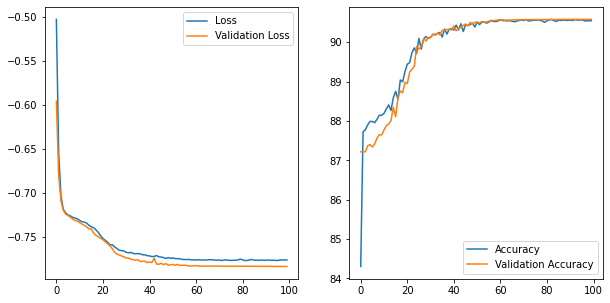

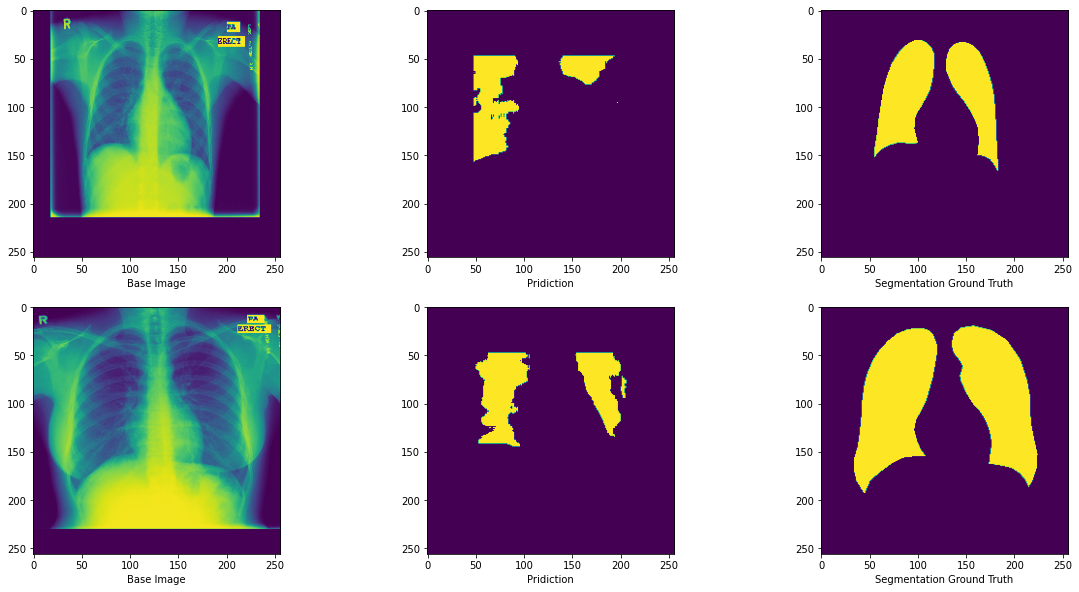

In [58]:
from IPython.display import clear_output
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split

net.compile(optimizer=Adam(lr=lr), 
              loss=[dice_p_bce], 
           metrics = [true_positive_rate, 'binary_accuracy'])

train_vol, test_vol, train_seg, test_seg = train_test_split((images-127.0)/127.0, 
                                                            (masks>127).astype(np.float32), 
                                                            test_size = 0.2, 
                                                            random_state = 2018)
loss_history = net.fit(x = train_vol,
                       y = train_seg,
                       
                  epochs = 100,
                  validation_data =(test_vol,test_seg) ,
                  callbacks=callbacks_list
                 )




fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()




prediction = net.predict(images[1:10])
plt.figure(figsize=(20,10))

for i in range(0,6,3):
    plt.subplot(2,3,i+1)
    plt.imshow(np.squeeze(images[i]))
    plt.xlabel("Base Image")
    
    plt.subplot(2,3,i+2)
    plt.imshow(np.squeeze(prediction[i]))
    plt.xlabel("Pridiction")
    plt.subplot(2,3,i+3)
    plt.imshow(np.squeeze(masks[i]))
    plt.xlabel("Segmentation Ground Truth")


In [59]:
pwd

'/content/gdirve/My Drive/Kaggle/Montgomery'

In [0]:
net.save("/content/gdirve/My Drive/Kaggle/model.h5")